In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import numpy as np
from sklearn import preprocessing
from pandas.api.types import is_numeric_dtype
import pickle

with open("data/som.pkl", "rb") as f:
    som = pickle.load(f)

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('data/full_data_clean.csv')
df1 = df[df["Status.simple"] == "Uninflamed"]
df1 = df1.drop(columns=['Status.simple'], axis=1)
df1

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy,nx,ny
11766,20210728_MBAA47_S10_R-1_D-S10_T44_R2,1,252,66,8.474821,0.016487,0.054871,0.760581,3.700084,4.139627,...,1.091651,0.904433,5.759771,6.738105,37.761224,101.427022,611.746032,572.111111,613.530303,569.651515
11767,20210728_MBAA47_S10_R-1_D-S10_T44_R2,3,124,42,8.474558,0.325907,2.033884,0.813884,3.667537,4.143735,...,1.324185,0.589952,6.556755,6.951760,66.859069,71.353464,768.016129,570.032258,769.547619,568.452381
11768,20210728_MBAA47_S10_R-1_D-S10_T44_R2,4,52,32,8.470174,0.000000,0.039511,0.603716,3.691019,4.184545,...,1.175371,0.492744,5.669160,5.902834,55.734393,69.453382,587.615385,564.846154,587.000000,565.250000
11769,20210728_MBAA47_S10_R-1_D-S10_T44_R2,6,184,80,8.476357,0.011318,0.142124,0.917423,3.681931,4.094297,...,1.235393,0.708919,5.805926,6.560143,50.802583,105.218624,180.608696,566.260870,180.875000,565.375000
11770,20210728_MBAA47_S10_R-1_D-S10_T44_R2,7,210,80,8.470743,0.009923,0.228420,0.965028,3.684695,4.130219,...,0.949579,0.521783,6.061011,6.570366,30.465898,62.152629,631.223810,564.671429,630.850000,563.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329601,20210807_MBAA047_S4_R-5_D-S4_T24_R3,1463,96,34,8.053616,0.000000,0.221326,0.623569,2.780555,4.075935,...,0.913478,0.289195,5.481026,6.206890,20.619907,45.271073,200.416667,20.291667,199.205882,19.970588
329602,20210807_MBAA047_S4_R-5_D-S4_T24_R3,1464,132,132,8.059590,0.065293,0.850183,0.397601,2.859436,4.056890,...,1.327932,0.135188,4.453033,4.453033,8.808425,8.808425,216.242424,21.318182,216.242424,21.318182
329603,20210807_MBAA047_S4_R-5_D-S4_T24_R3,1465,248,84,8.053698,0.104584,1.033623,0.550874,2.794121,4.077096,...,1.987078,0.507301,5.422371,5.538862,25.741095,20.553161,239.032258,12.258065,234.309524,17.523810
329604,20210807_MBAA047_S4_R-5_D-S4_T24_R3,1466,128,44,8.053788,0.015954,0.364804,0.783903,2.820274,4.059657,...,1.014212,0.285128,5.859836,6.460671,20.945120,35.835354,193.375000,15.171875,194.681818,16.772727


In [3]:
df1n = df1.copy()
dic = {}
for c in df1n.columns[1:]:
    if is_numeric_dtype(df1n[c]):
        dic[c] = preprocessing.MinMaxScaler().fit(df1n[c].values.reshape(-1,1))
        df1n[c] = dic[c].transform(df1n[c].values.reshape(-1,1)).reshape(-1)
df1n

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy,nx,ny
11766,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000000,0.288312,0.195312,0.134022,0.006014,0.007561,0.090078,0.274994,0.120414,...,0.140128,0.127807,0.414127,0.440406,0.069873,0.168297,0.360493,0.343167,0.361549,0.342161
11767,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000257,0.122078,0.101562,0.133998,0.118884,0.280272,0.096391,0.268309,0.121132,...,0.169976,0.083367,0.473233,0.454709,0.123715,0.118396,0.453044,0.341911,0.453951,0.341437
11768,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000386,0.028571,0.062500,0.133606,0.000000,0.005445,0.071500,0.273132,0.128268,...,0.150874,0.069631,0.407407,0.384488,0.103130,0.115244,0.346201,0.338777,0.345837,0.339503
11769,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000644,0.200000,0.250000,0.134159,0.004129,0.019585,0.108654,0.271266,0.112488,...,0.158579,0.100179,0.417550,0.428492,0.094004,0.174589,0.105150,0.339632,0.105308,0.339578
11770,20210728_MBAA47_S10_R-1_D-S10_T44_R2,0.000772,0.233766,0.250000,0.133657,0.003620,0.031477,0.114292,0.271833,0.118769,...,0.121891,0.073734,0.436468,0.429177,0.056374,0.103129,0.372028,0.338671,0.371807,0.338295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329601,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188160,0.085714,0.070312,0.096292,0.000000,0.030499,0.073852,0.086133,0.109278,...,0.117257,0.040867,0.393454,0.404843,0.038155,0.075118,0.116881,0.009738,0.116164,0.010161
329602,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188288,0.132468,0.453125,0.096827,0.023818,0.117157,0.047089,0.102334,0.105948,...,0.170457,0.019104,0.317215,0.287430,0.016299,0.014616,0.126254,0.010358,0.126254,0.010975
329603,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188417,0.283117,0.265625,0.096299,0.038150,0.142435,0.065242,0.088919,0.109481,...,0.255067,0.071688,0.389104,0.360122,0.047631,0.034104,0.139751,0.004884,0.136954,0.008683
329604,20210807_MBAA047_S4_R-5_D-S4_T24_R3,0.188546,0.127273,0.109375,0.096307,0.005820,0.050271,0.092841,0.094290,0.106432,...,0.130187,0.040292,0.421548,0.421833,0.038756,0.059461,0.112711,0.006644,0.113485,0.008230


In [4]:
# grouped = dfn.drop(["cx", "cy"], axis = 1).groupby('ImageNumber')
grouped = df1n.groupby('ImageNumber')
# grouped.count()

In [5]:


# som = SOM(m=4, n=4, dim=56)
# maxs = 0
# keep = None
# t = 10
# for i in range(t):
#     for name, group in grouped:
#         features = group._get_numeric_data().values
#         if len(features) > maxs:
#             maxs = len(features)
#             keep = features
#         epoch = len(features)*(i+1)
#         som.fit(features, epochs=epoch)
l = df1n["ImageNumber"].unique()
id = 0

C:\Users\Arthur\AppData\Local\Temp\ipykernel_25440\2685220022.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep["pred"] = som.predict(keep._get_numeric_data().values)
C:\Users\Arthur\AppData\Local\Temp\ipykernel_25440\2685220022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keep["name"] = keep["pred"].apply(lambda x: cellType.cellTypeDict[x])


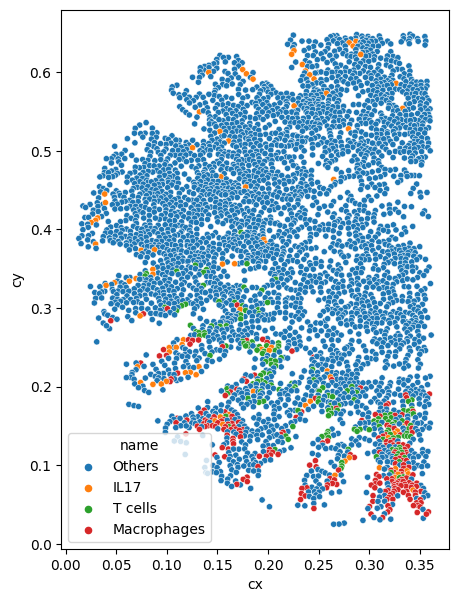

In [10]:
keep = df1n[df1n["ImageNumber"] == l[id]]
id += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = keep['cx']
y = keep['cy']
keep["pred"] = som.predict(keep._get_numeric_data().values)
keep["name"] = keep["pred"].apply(lambda x: cellType.cellTypeDict[x])
sns.scatterplot(x='cx', y='cy', data=keep, hue='name', size='name', sizes=(20, 20), ax=ax)


plt.show()

In [7]:

dfn = df.copy()
dic = {}
for c in dfn.columns[1:]:
    if is_numeric_dtype(dfn[c]):
        dic[c] = preprocessing.MinMaxScaler().fit(dfn[c].values.reshape(-1,1))
        dfn[c] = dic[c].transform(dfn[c].values.reshape(-1,1)).reshape(-1)

dfn["pred"] = som.predict(dfn._get_numeric_data().values)


(array([ 8622., 22099., 11959., 30593., 23181., 30028., 16663.,  5809.,
         7274., 32111., 29247., 24723., 23308., 67586., 23135., 37794.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <BarContainer object of 16 artists>)

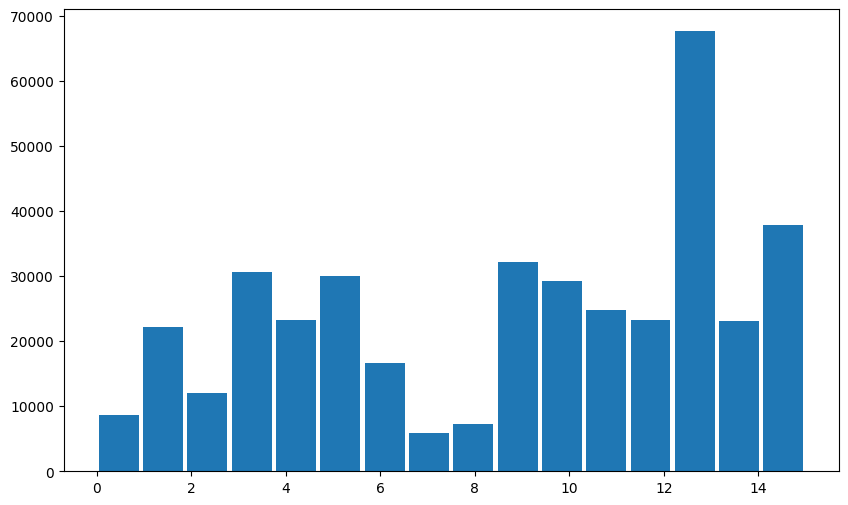

In [8]:
plt.hist(dfn["pred"], bins=16, rwidth=0.9)

In [9]:
from cellType import CellType as ct

cluster_centers = som.cluster_centers_
cluster_centers = cluster_centers.reshape(16, 56)
cellType = ct(cluster_centers)
cellType.setCellType()
dfn["name"] = dfn["pred"].apply(lambda x: cellType.cellTypeDict[x])
dfn


,Status.simple,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,...,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy,nx,ny,pred,name
0,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,0.000000,0.262338,0.410853,0.031109,0.004701,0.048433,0.058753,0.080901,...,0.348802,0.332818,0.072366,0.093897,0.321439,0.234739,0.321917,0.235586,9,Others
1,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,0.000032,0.046753,0.100775,0.031483,0.008209,0.039180,0.065552,0.080043,...,0.347382,0.333098,0.076808,0.094357,0.261608,0.235745,0.261283,0.236612,14,Others
2,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,0.000064,0.187013,0.162791,0.031358,0.003143,0.033501,0.047563,0.080923,...,0.313884,0.324091,0.056879,0.119486,0.053969,0.235384,0.054324,0.236109,14,Others
3,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,0.000096,0.202597,0.217054,0.031257,0.016530,0.048767,0.070238,0.077140,...,0.338226,0.314813,0.083154,0.105224,0.116077,0.236524,0.115443,0.236223,14,Others
4,Dysplastic,20200731_MBAA047_S11_R-4_D-S11_T59_R1,0.000128,0.062338,0.124031,0.031078,0.000000,0.022990,0.069749,0.074626,...,0.334019,0.318001,0.100129,0.130012,0.151994,0.235464,0.152614,0.236080,14,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394127,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.144763,0.511688,0.697674,0.132671,0.037164,0.167221,0.078155,0.129874,...,0.431658,0.425848,0.051111,0.071326,0.046715,0.004684,0.047225,0.005338,12,Others
394128,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.144795,0.158442,0.046512,0.132750,0.109236,0.319517,0.075105,0.139491,...,0.358375,0.388561,0.029084,0.069373,0.069238,0.004914,0.069739,0.005320,13,Others
394129,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.144827,0.018182,0.108527,0.132818,0.000000,0.017826,0.058772,0.107445,...,0.392476,0.354847,0.036228,0.032486,0.012442,0.004142,0.012446,0.004606,13,Others
394130,Dysplastic,20210808_MBAA047_S8_R-8_D-S8_T40_R1,0.144859,0.072727,0.069767,0.133294,0.007758,0.084672,0.063157,0.143357,...,0.446548,0.447615,0.064076,0.110245,0.048907,0.002086,0.048183,0.003036,13,Others
